## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
As we raise the noise level, we see less distinct clusters.
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
The elbow point represents the optimal number of clusters at each noise level. Higher noise levels have less obvious elbows.
4. Explain the intuition of the elbow, using this numerical simulation as an example.
As the noise level increases, clusters are less separated leading to the lack of a strong elbow.

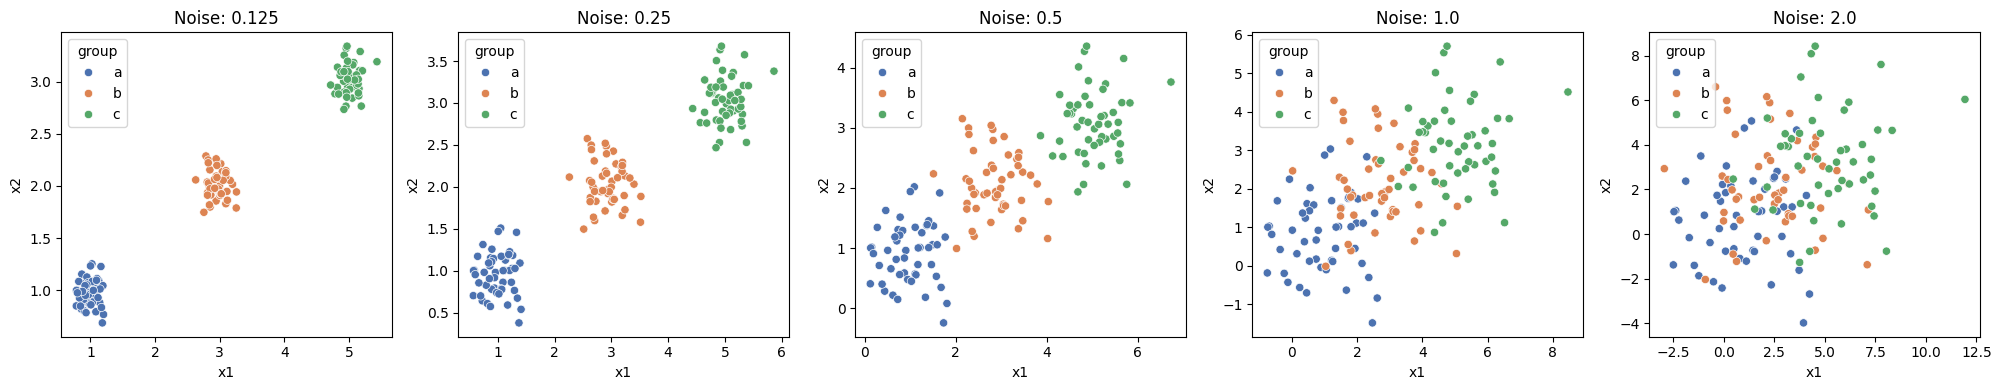

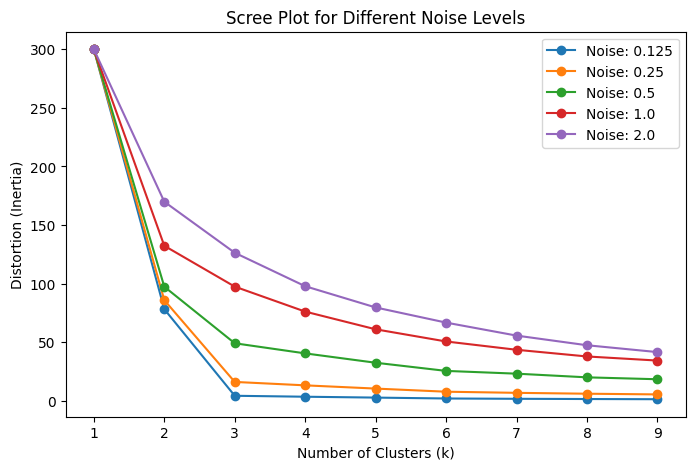

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Used ChatGPT for code assistance

# Function to create dataset with noise
def createData(noise, N=50):
    np.random.seed(100)  # Set seed for replicability
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df

# Create datasets with increasing noise
datasets = {
    "0.125": createData(0.125),
    "0.25": createData(0.25),
    "0.5": createData(0.5),
    "1.0": createData(1.0),
    "2.0": createData(2.0)
}

# Scatter plots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (noise, df) in zip(axes, datasets.items()):
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', ax=ax, palette='deep')
    ax.set_title(f"Noise: {noise}")
plt.tight_layout()
plt.show()

# Scree plots
fig, ax = plt.subplots(figsize=(8, 5))

for noise, df in datasets.items():
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[['x1', 'x2']])

    # Fit KMeans for different cluster numbers
    distortions = []
    K_range = range(1, 10)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X_scaled)
        distortions.append(kmeans.inertia_)

    ax.plot(K_range, distortions, marker='o', label=f"Noise: {noise}")

ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Distortion (Inertia)")
ax.set_title("Scree Plot for Different Noise Levels")
ax.legend()
plt.show()

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
The politicians in the smallest two clusters include Steve Scalise, Ted Cruz, and Chuck Schumer. Almost all of these races were decided by at least 10%. These are well known politicians mostly in large districts, so it makes sense that they would be able to raise a lot of money.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

These clusters are much less robust, but Ron Johnson and David Trone both won in close races. This may be due to the pressure of a close race, and having to take on more debt as a result.

4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
These results are much better than the cash on hand vs debts, and slightly less clear than the raised and spent clusters.
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?
It did to a degree, it was interesting to see the large cluster in cash on hand vs debts showing that almost all campaigns have more cash on hand than debts.


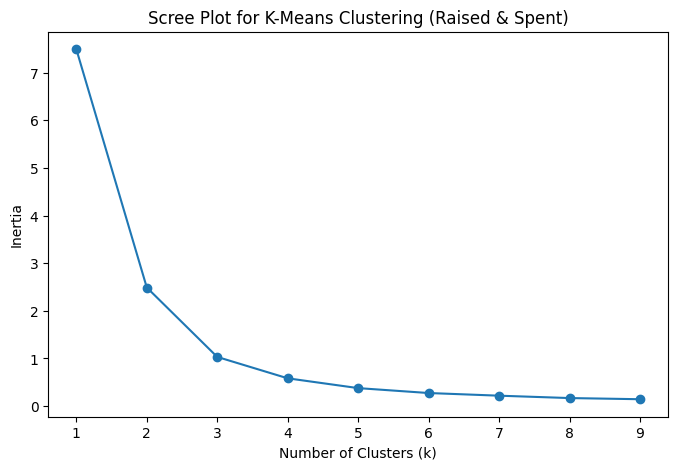

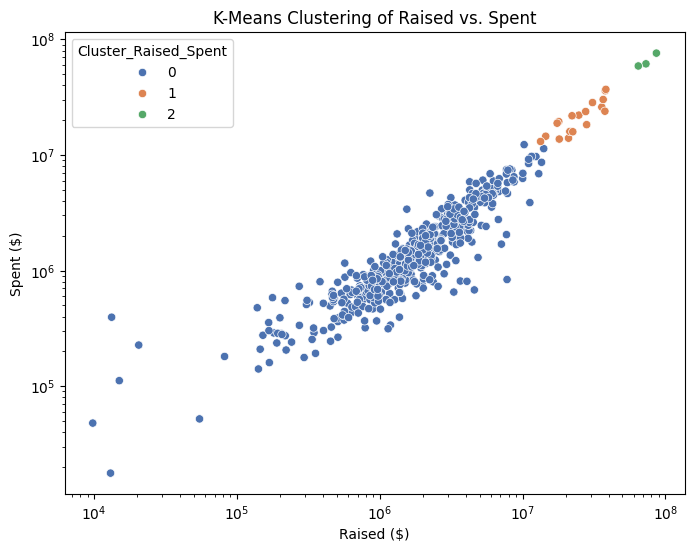

Politicians in the smallest two clusters:
                     Member      Raised       Spent
2               Adam Schiff  20993041.0  13957854.0
87   Catherine Cortez Masto  37993811.0  35928936.0
89            Chuck Schumer  35899966.0  25944350.0
115            Dan Crenshaw  14535870.0  14512435.0
261            John Kennedy  28119082.0  18276565.0
290            Katie Porter  21441693.0  15946876.0
298          Kevin McCarthy  24791538.0  22086344.0
326           Maggie Hassan  30914830.0  28380992.0
328             Marco Rubio  36709285.0  30153111.0
340              Mark Kelly  73140886.0  61357281.0
357          Michael Bennet  18086343.0  13713611.0
390            Nancy Pelosi  22216583.0  21814643.0
402            Patty Murray  13377243.0  13073248.0
414               Rand Paul  22490627.0  15865010.0
417         Raphael Warnock  86581469.0  75959810.0
442             Ron Johnson  27680901.0  23731653.0
476           Steve Scalise  17940130.0  19428130.0
490                Ted

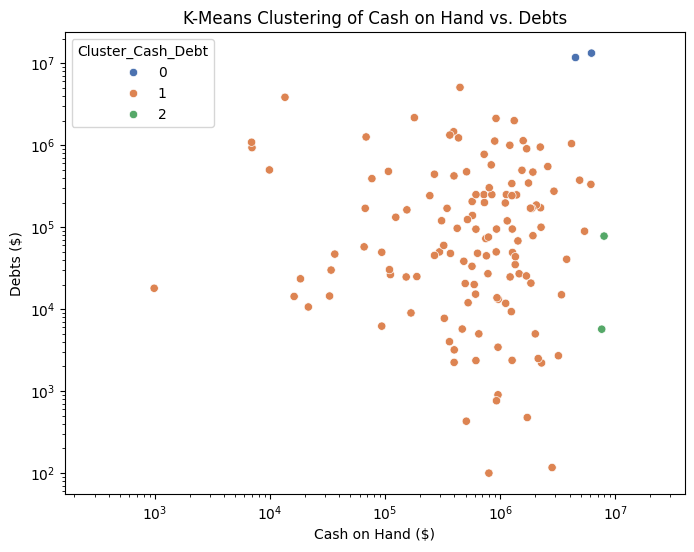

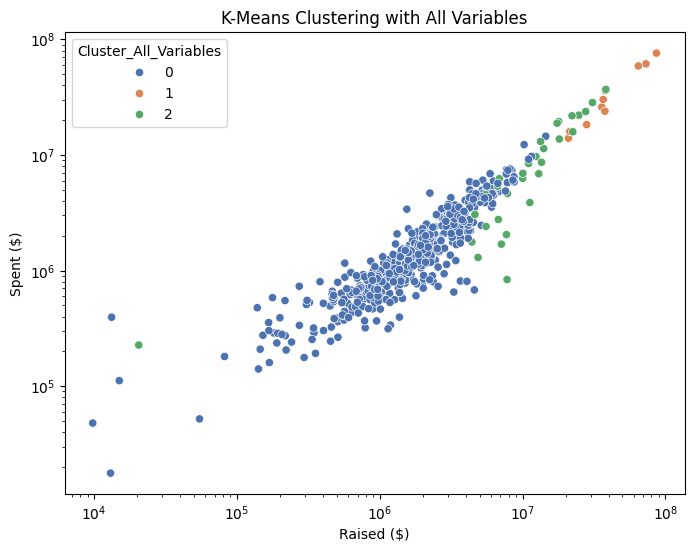

Cluster counts for all four variables:
Cluster_All_Variables
0    494
2     34
1      9
Name: count, dtype: int64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("2022 election cycle fundraising.csv")

# Clean dollar-denominated columns
def clean_currency(column):
    return column.replace(['\$', ','], '', regex=True).astype(float)

financial_columns = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df[financial_columns] = df[financial_columns].apply(clean_currency)

# Normalize Raised and Spent
scaler = MinMaxScaler()
df[['Raised_norm', 'Spent_norm']] = scaler.fit_transform(df[['Raised', 'Spent']])

# Determine optimal clusters using Scree Plot
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[['Raised_norm', 'Spent_norm']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Scree Plot for K-Means Clustering (Raised & Spent)")
plt.show()

# Apply K-Means with optimal k (assume k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_Raised_Spent'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm']])

# Scatter plot of Raised vs. Spent, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster_Raised_Spent', palette='deep')
plt.xscale("log")  # Log scale to handle large differences in values
plt.yscale("log")
plt.xlabel("Raised ($)")
plt.ylabel("Spent ($)")
plt.title("K-Means Clustering of Raised vs. Spent")
plt.show()

# Identify politicians in the smallest clusters
smallest_clusters = df['Cluster_Raised_Spent'].value_counts().index[-2:]
smallest_politicians = df[df['Cluster_Raised_Spent'].isin(smallest_clusters)][['Member', 'Raised', 'Spent']]
print("Politicians in the smallest two clusters:")
print(smallest_politicians)

# Repeat for Cash on Hand and Debts
df[['Cash_norm', 'Debt_norm']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_Cash_Debt'] = kmeans.fit_predict(df[['Cash_norm', 'Debt_norm']])

# Identify politicians in the smallest clusters for Cash on Hand vs. Debts
smallest_clusters_cash_debt = df['Cluster_Cash_Debt'].value_counts().index[-2:]
smallest_politicians_cash_debt = df[df['Cluster_Cash_Debt'].isin(smallest_clusters_cash_debt)][['Member', 'Cash on Hand', 'Debts']]
print("Politicians in the smallest two clusters for Cash on Hand vs. Debts:")
print(smallest_politicians_cash_debt)
for cluster in smallest_clusters_cash_debt:
    print(f"Members of cluster {cluster} for Cash on Hand and Debts:")
    print(df[df['Cluster_Cash_Debt'] == cluster][['Member', 'Cash on Hand', 'Debts']])
    print("\n")



plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster_Cash_Debt', palette='deep')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Cash on Hand ($)")
plt.ylabel("Debts ($)")
plt.title("K-Means Clustering of Cash on Hand vs. Debts")
plt.show()

# K-Means clustering using all four variables
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_All_Variables'] = kmeans.fit_predict(df[['Raised_norm', 'Spent_norm', 'Cash_norm', 'Debt_norm']])

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster_All_Variables', palette='deep')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Raised ($)")
plt.ylabel("Spent ($)")
plt.title("K-Means Clustering with All Variables")
plt.show()

# Summary of cluster counts
print("Cluster counts for all four variables:")
print(df['Cluster_All_Variables'].value_counts())


**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?